<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outils-projet" data-toc-modified-id="Outils-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outils projet</a></span></li><li><span><a href="#La-lecture-de-l'échantillon-initial" data-toc-modified-id="La-lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La lecture de l'échantillon initial</a></span></li><li><span><a href="#Le-déclaration-des-classifieurs" data-toc-modified-id="Le-déclaration-des-classifieurs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Le déclaration des classifieurs</a></span></li><li><span><a href="#La-courbe-ROC-(Receiver-Operating-Caracteristic)" data-toc-modified-id="La-courbe-ROC-(Receiver-Operating-Caracteristic)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>La courbe ROC (Receiver Operating Caracteristic)</a></span><ul class="toc-item"><li><span><a href="#La-probabilité-de-prédiction" data-toc-modified-id="La-probabilité-de-prédiction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>La probabilité de prédiction</a></span></li><li><span><a href="#Le-tableau-des-résultats" data-toc-modified-id="Le-tableau-des-résultats-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Le tableau des résultats</a></span></li><li><span><a href="#Prédiction-à-50%" data-toc-modified-id="Prédiction-à-50%-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Prédiction à 50%</a></span></li><li><span><a href="#Prédiction-à-68,66%" data-toc-modified-id="Prédiction-à-68,66%-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Prédiction à 68,66%</a></span></li><li><span><a href="#Prédiction-à-11,48%" data-toc-modified-id="Prédiction-à-11,48%-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Prédiction à 11,48%</a></span></li></ul></li><li><span><a href="#Calculs-des-métriques" data-toc-modified-id="Calculs-des-métriques-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculs des métriques</a></span><ul class="toc-item"><li><span><a href="#La-courbe-ROC" data-toc-modified-id="La-courbe-ROC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>La courbe ROC</a></span></li><li><span><a href="#Le-changement-du-pas-de-calcul" data-toc-modified-id="Le-changement-du-pas-de-calcul-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Le changement du pas de calcul</a></span></li><li><span><a href="#La-courbe-précision-rappel" data-toc-modified-id="La-courbe-précision-rappel-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>La courbe précision-rappel</a></span></li></ul></li></ul></div>

>> **Vous trouvez les données et leur description :**<br>
>> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29<br>
>> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data<br>

In [1]:
import pandas as pd              
import seaborn as sns  
import os, warnings

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


# Outils projet

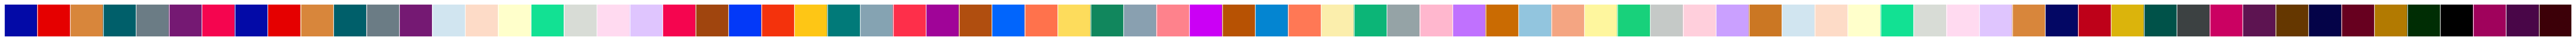

In [2]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
sns.palplot(sns.color_palette(palette))

In [3]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'ROC Classification Binaire Breast Cancer Wisconsin'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

In [5]:
from sklearn.preprocessing import LabelEncoder


# La lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [6]:
nomsDiag = {'M':1,'B':0}
nomsDiagInv = {1:'M',0:'B'}
breastCancer = pd.read_csv('../donnees/Breast Cancer Wisconsin (Diagnostic)/breastCancer.csv', index_col='id').drop(columns='Unnamed: 32')
breastCancer.diagnosis = breastCancer.diagnosis.apply(lambda x : nomsDiag[x])
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
boxCox  = PowerTransformer(method='box-cox')
X = breastCancer.drop(columns='diagnosis')
y = breastCancer.diagnosis
X = boxCox.fit(X+1).transform(X+1)

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

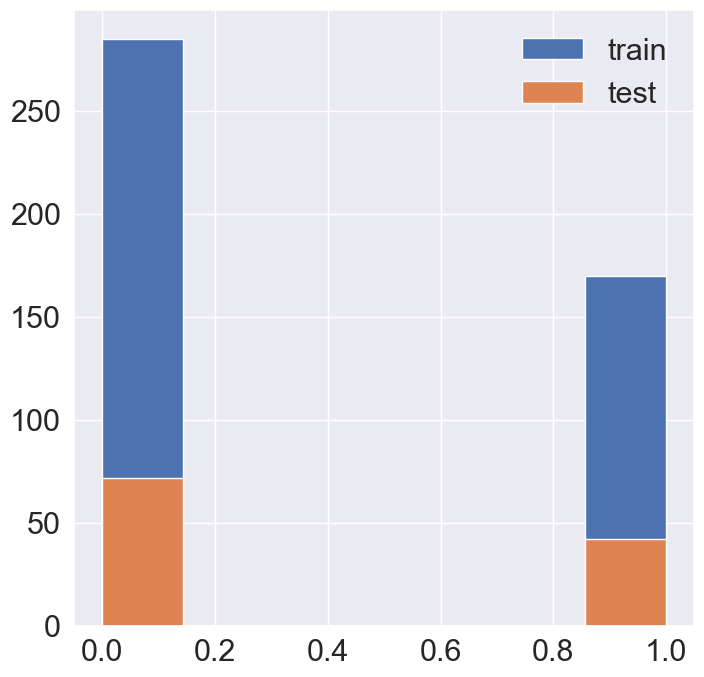

In [8]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")

# Le déclaration des classifieurs 

In [9]:
import pickle
pickle_file = "optimisationNuSVC.pickle"

with open(os.path.join(repertoireDonnees, pickle_file), 'rb') as f:
    gridCVSauvegarde = pickle.load(f)

In [10]:
dictModels = {'Radial_SVMC':gridCVSauvegarde.best_estimator_}

# La courbe ROC (Receiver Operating Caracteristic)

0.956140350877193
L'aire sous la courbe ROC : 0.99437831 
Score de prédiction à 50% : 0.95614035


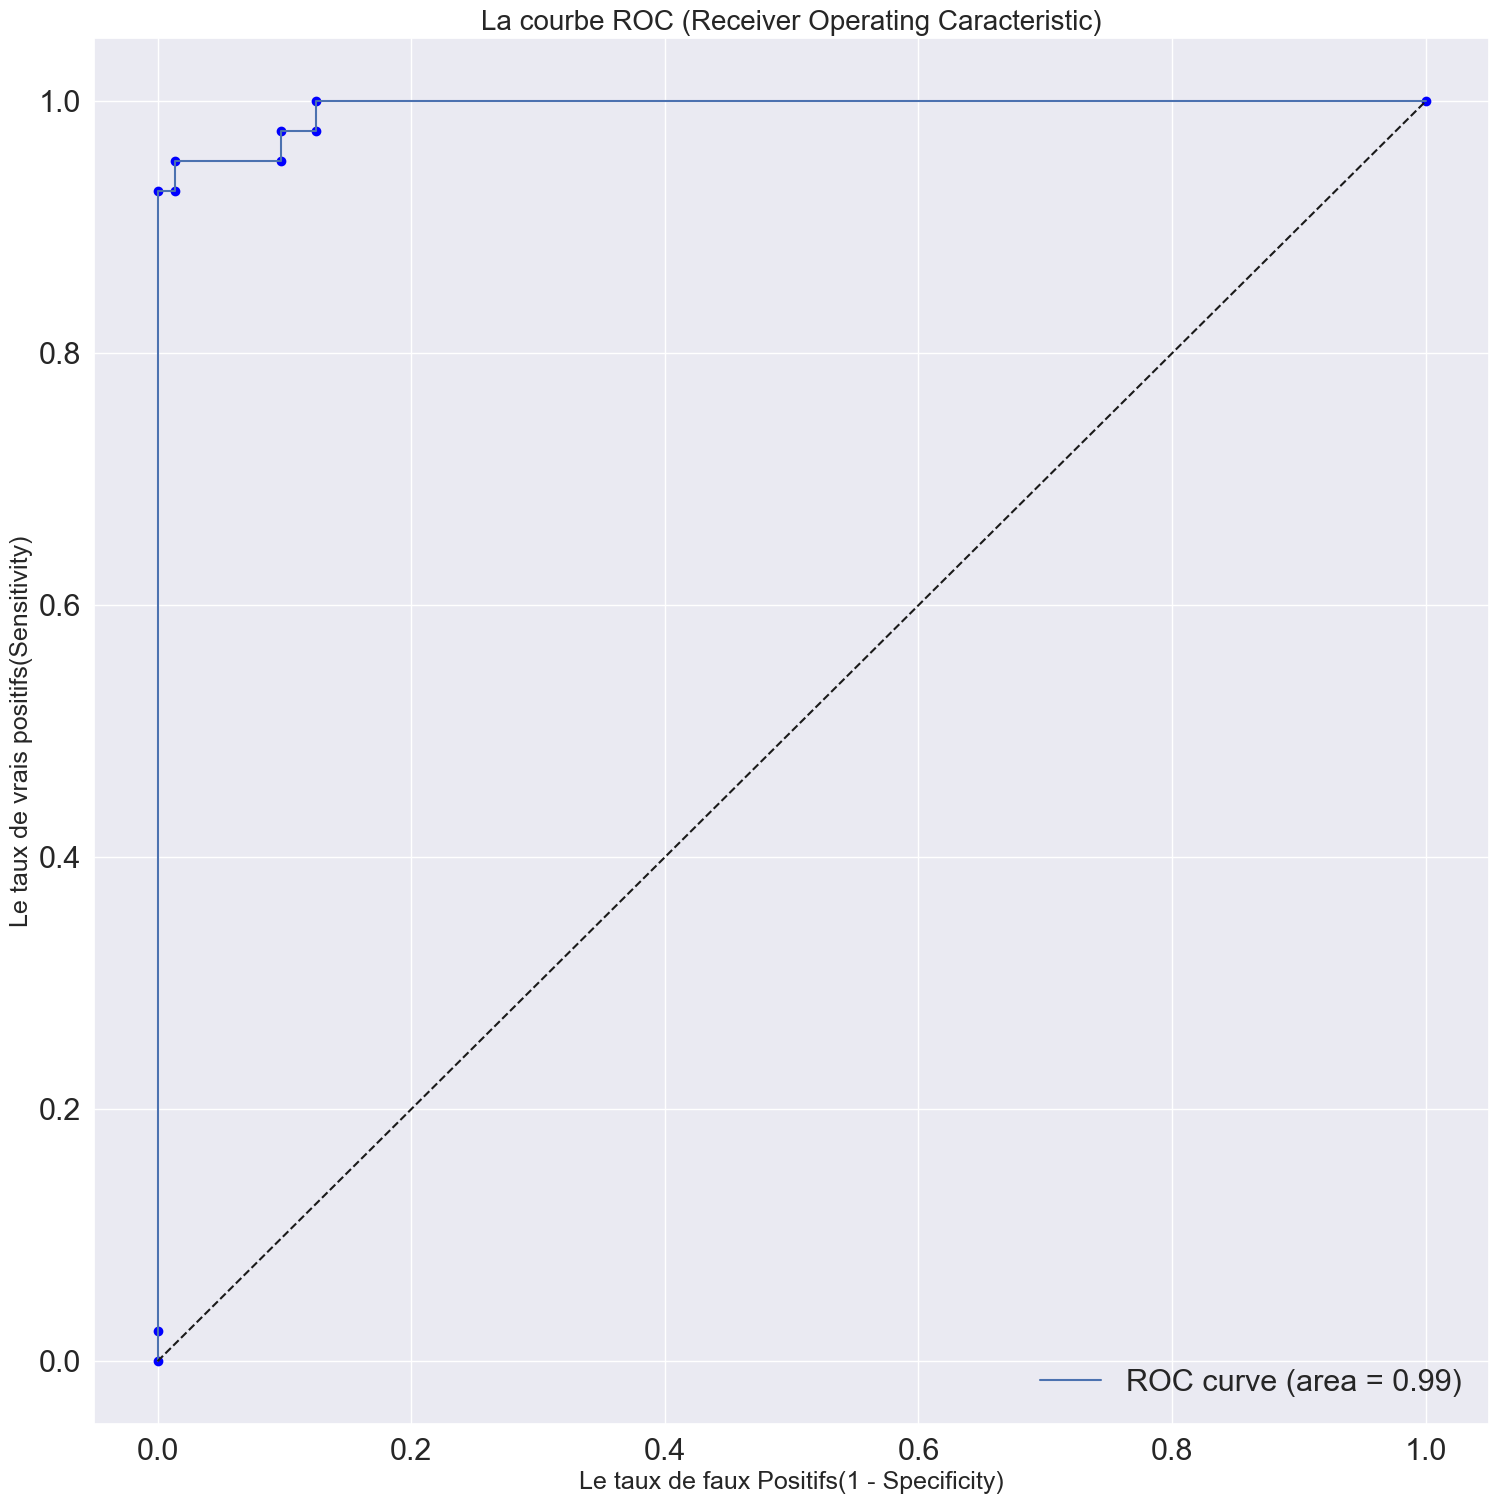

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = dictModels['Radial_SVMC'].fit(X_train, y_train)
print(clf.score(X_test, y_test))
probas = clf.predict_proba(X_test)
pred   = clf.predict(X_test) # 50%


import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])


roc_auc = auc(fpr, tpr)
print ("L'aire sous la courbe ROC : %.8f \nScore de prédiction à 50%% : %.8f" % (roc_auc,clf.score(X_test, y_test)))

plt.figure(figsize=(18, 18))
plt.scatter(fpr, tpr, color='blue')
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## La probabilité de prédiction

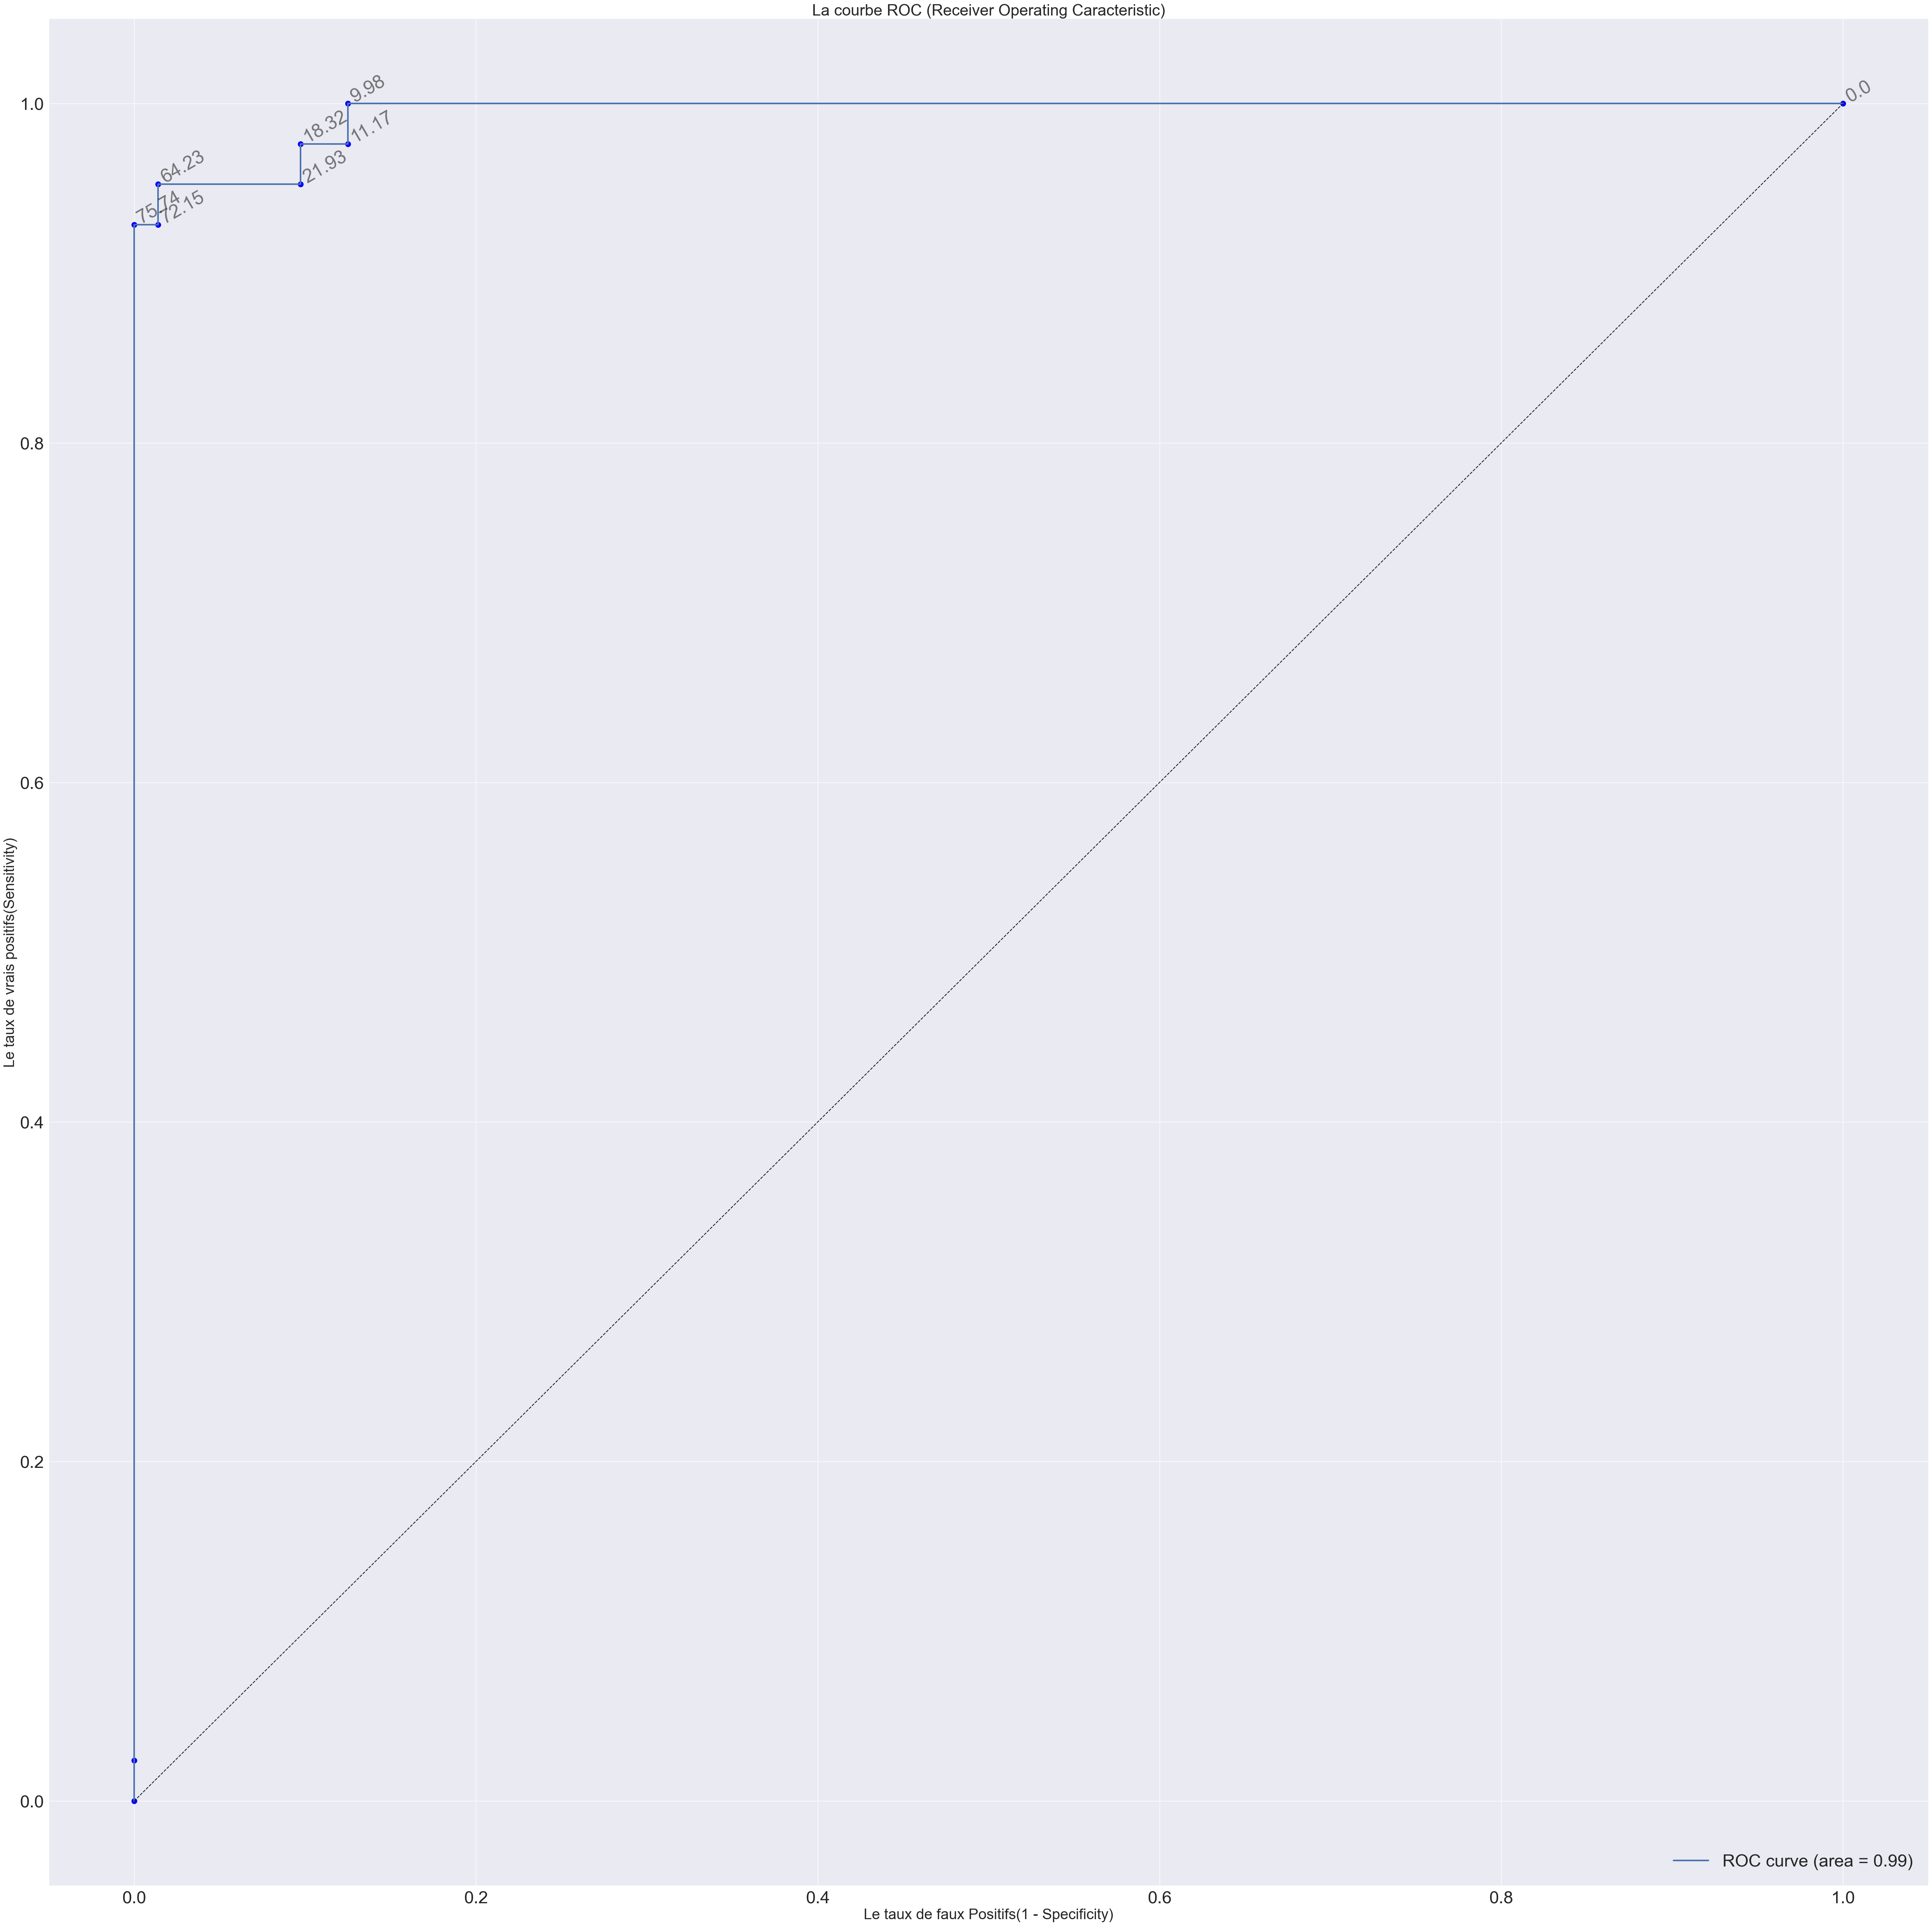

In [12]:
sns.set(font_scale=3)
plt.figure(figsize=(64, 64))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3)
plt.scatter( fpr, tpr, color='blue', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

for i,t in enumerate(thresholds*100):
    if i > 1 :
        plt.text(fpr[i], tpr[i]+0.001,str(t.round(2)), rotation= 30, alpha=0.6) 
        
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=28)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=28)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=30)
plt.legend(loc="lower right")        
sns.set(font_scale=2)

## Le tableau des résultats 

In [15]:
print(X_test.shape)
dfROC = pd.DataFrame({'Probabilite':probas[:,1],
                      'Observation':y_test.ravel(),
                      'Prediction':0
                    }).sort_values(by='Probabilite',ascending=False)
dfROC.head(10)

(114, 30)


,Probabilite,Observation,Prediction
100,1.0,1,0
112,1.0,1,0
11,1.0,1,0
24,1.0,1,0
68,1.0,1,0
67,1.0,1,0
12,1.0,1,0
96,1.0,1,0
63,1.0,1,0
92,1.0,1,0


In [16]:
dfROC.tail(10)

,Probabilite,Observation,Prediction
90,0.000108,0,0
95,0.000099,0,0
65,0.000075,0,0
10,0.000065,0,0
105,0.000050,0,0
50,0.000045,0,0
93,0.000032,0,0
111,0.000029,0,0
13,0.000010,0,0
16,0.000004,0,0


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(probas,columns=['bénin', 
                             'malin']).sort_values(by ='malin',ascending=False)

,bénin,malin
100,1.199062e-10,1.000000
112,8.351300e-10,1.000000
11,3.768255e-09,1.000000
24,4.153401e-09,1.000000
68,5.091054e-09,1.000000
67,5.507961e-09,1.000000
12,6.052572e-09,1.000000
96,6.140508e-09,1.000000
63,6.709292e-09,1.000000
92,1.713517e-08,1.000000


## Prédiction à 50%

In [16]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .5 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,70,2
1,2,40


## Prédiction à 68,66%

In [17]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .7574 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,72,3
1,0,39


In [19]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .6422 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,71,2
1,1,40


## Prédiction à 11,48%

In [20]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .114893 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,64,1
1,8,41


In [22]:
df = dfROC
df.Prediction = df.Probabilite.apply(lambda x: 0 if x < .0998 else 1)
pd.crosstab(df.Prediction,df.Observation)

Observation,0,1
Prediction,,
0,63,0
1,9,42


# Calculs des métriques

In [23]:
def calculMC (df, taux):
    df.Prediction = df.Probabilite.apply(lambda x: 0 
                                         if x < taux else 1)
    tailleEchantillon = df.Observation.count()
    vraisNegatifs     = confusion_matrix(df.Observation, df.Prediction)[0, 0]
    fauxPositifs      = confusion_matrix(df.Observation, df.Prediction)[0, 1]
    fauxNegatifs      = confusion_matrix(df.Observation, df.Prediction)[1, 0]
    vraisPositifs     = confusion_matrix(df.Observation, df.Prediction)[1, 1]

    Sensibilite       = vraisPositifs / (vraisPositifs + fauxNegatifs)
    Specificite       = vraisNegatifs / (fauxPositifs  + vraisNegatifs)

    Precision     = vraisPositifs / (vraisPositifs + fauxPositifs)
    F1Score       = 2 * Precision * Sensibilite / (Precision + Sensibilite)
    
    Prevalence    = (vraisPositifs + fauxNegatifs) / (vraisPositifs + fauxPositifs  + fauxNegatifs + vraisNegatifs)

    valeurPreditePositive = Sensibilite*Prevalence / (Sensibilite*Prevalence + ((1 - Specificite)*(1-Prevalence)))
    valeurPrediteNegative = Specificite*(1-Prevalence)/(Prevalence*(1-Sensibilite) + (Specificite*(1-Prevalence)))
    
    return [Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs]

In [24]:
Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs = \
                        dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict()

nb = 1000
for i in range(nb + 1):
    t = (nb - i) / nb
    Sensibilite[t],Specificite[t],Precision[t],F1Score[t],valeurPreditePositive[t],valeurPrediteNegative[t],vraisPositifs[t],vraisNegatifs[t],fauxNegatifs[t],fauxPositifs[t] = calculMC(dfROC, t)   

## La courbe ROC

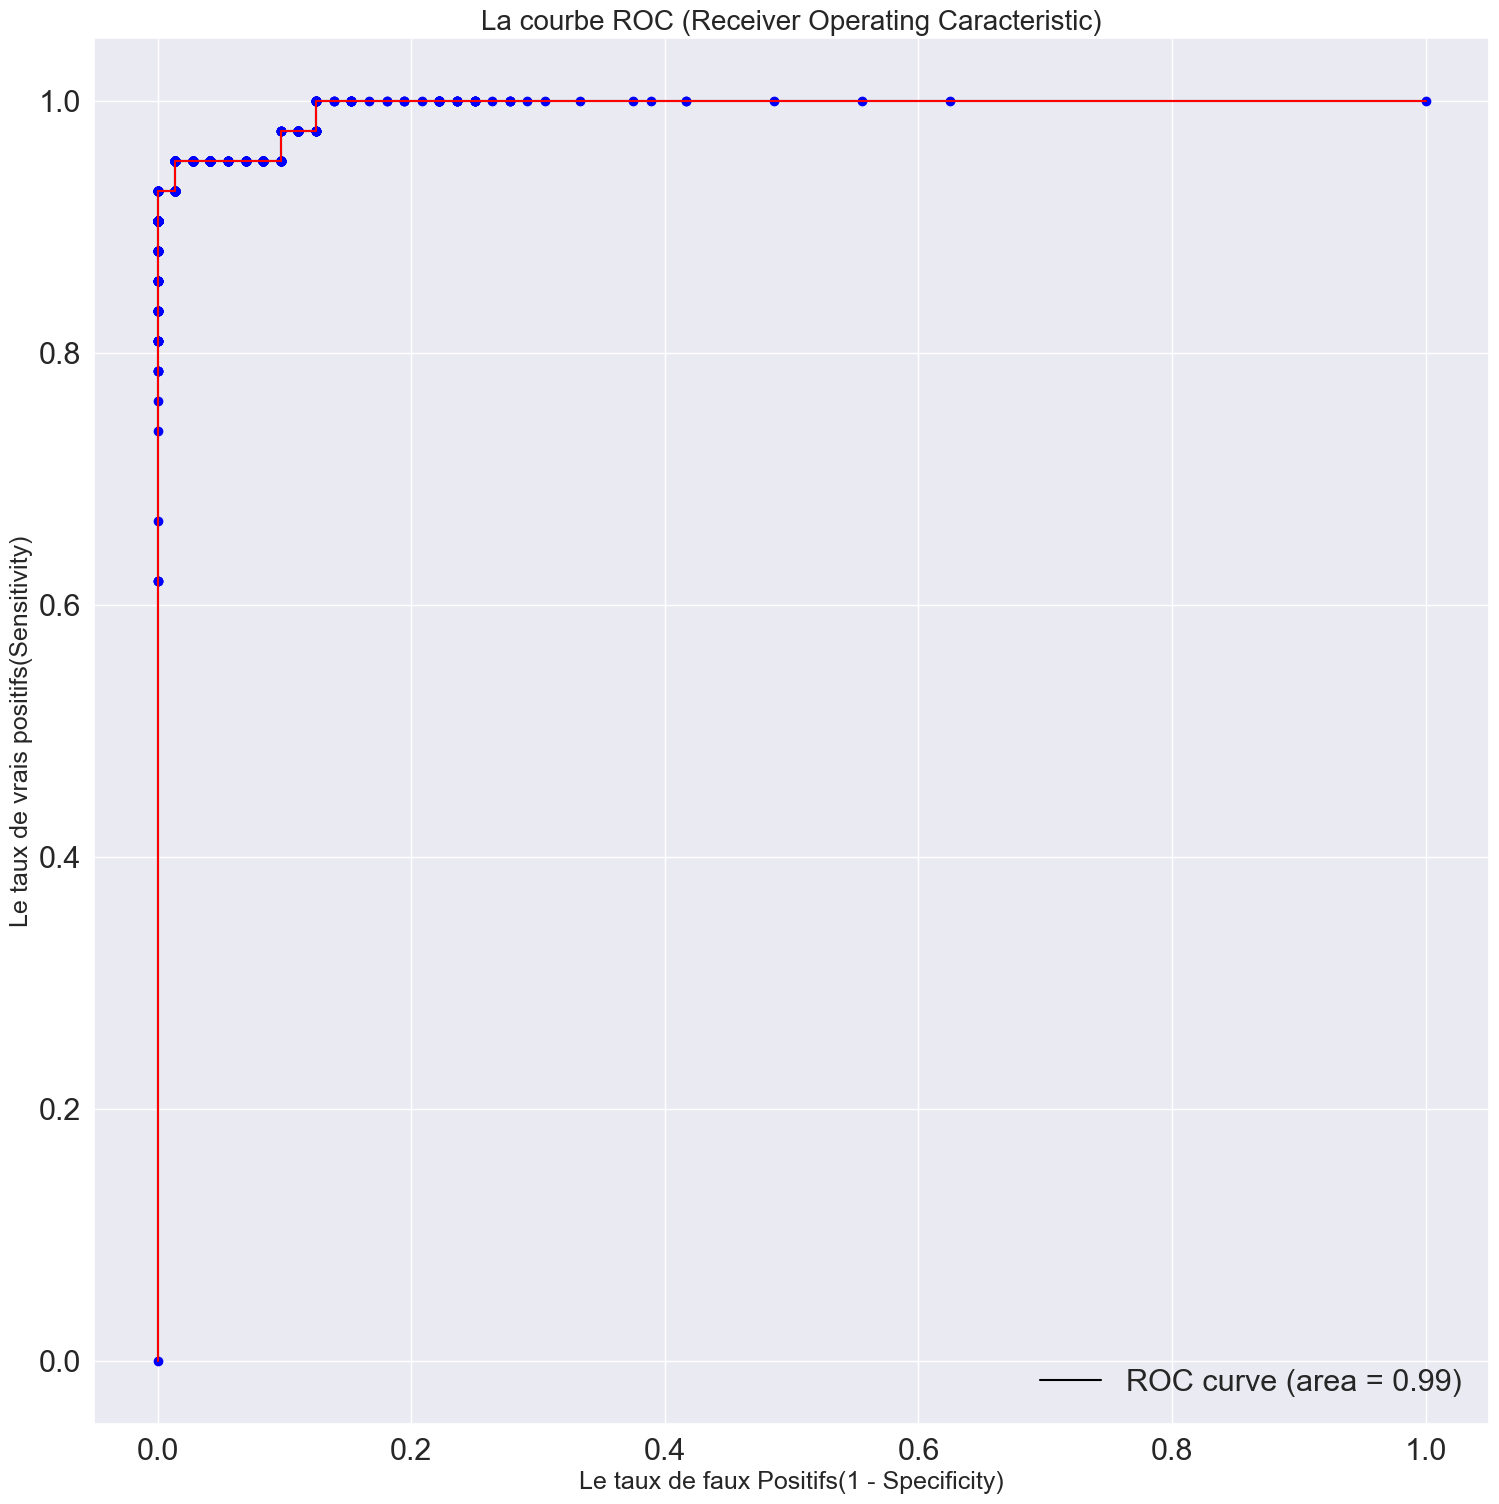

In [25]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
                 roc_auc, color='black')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

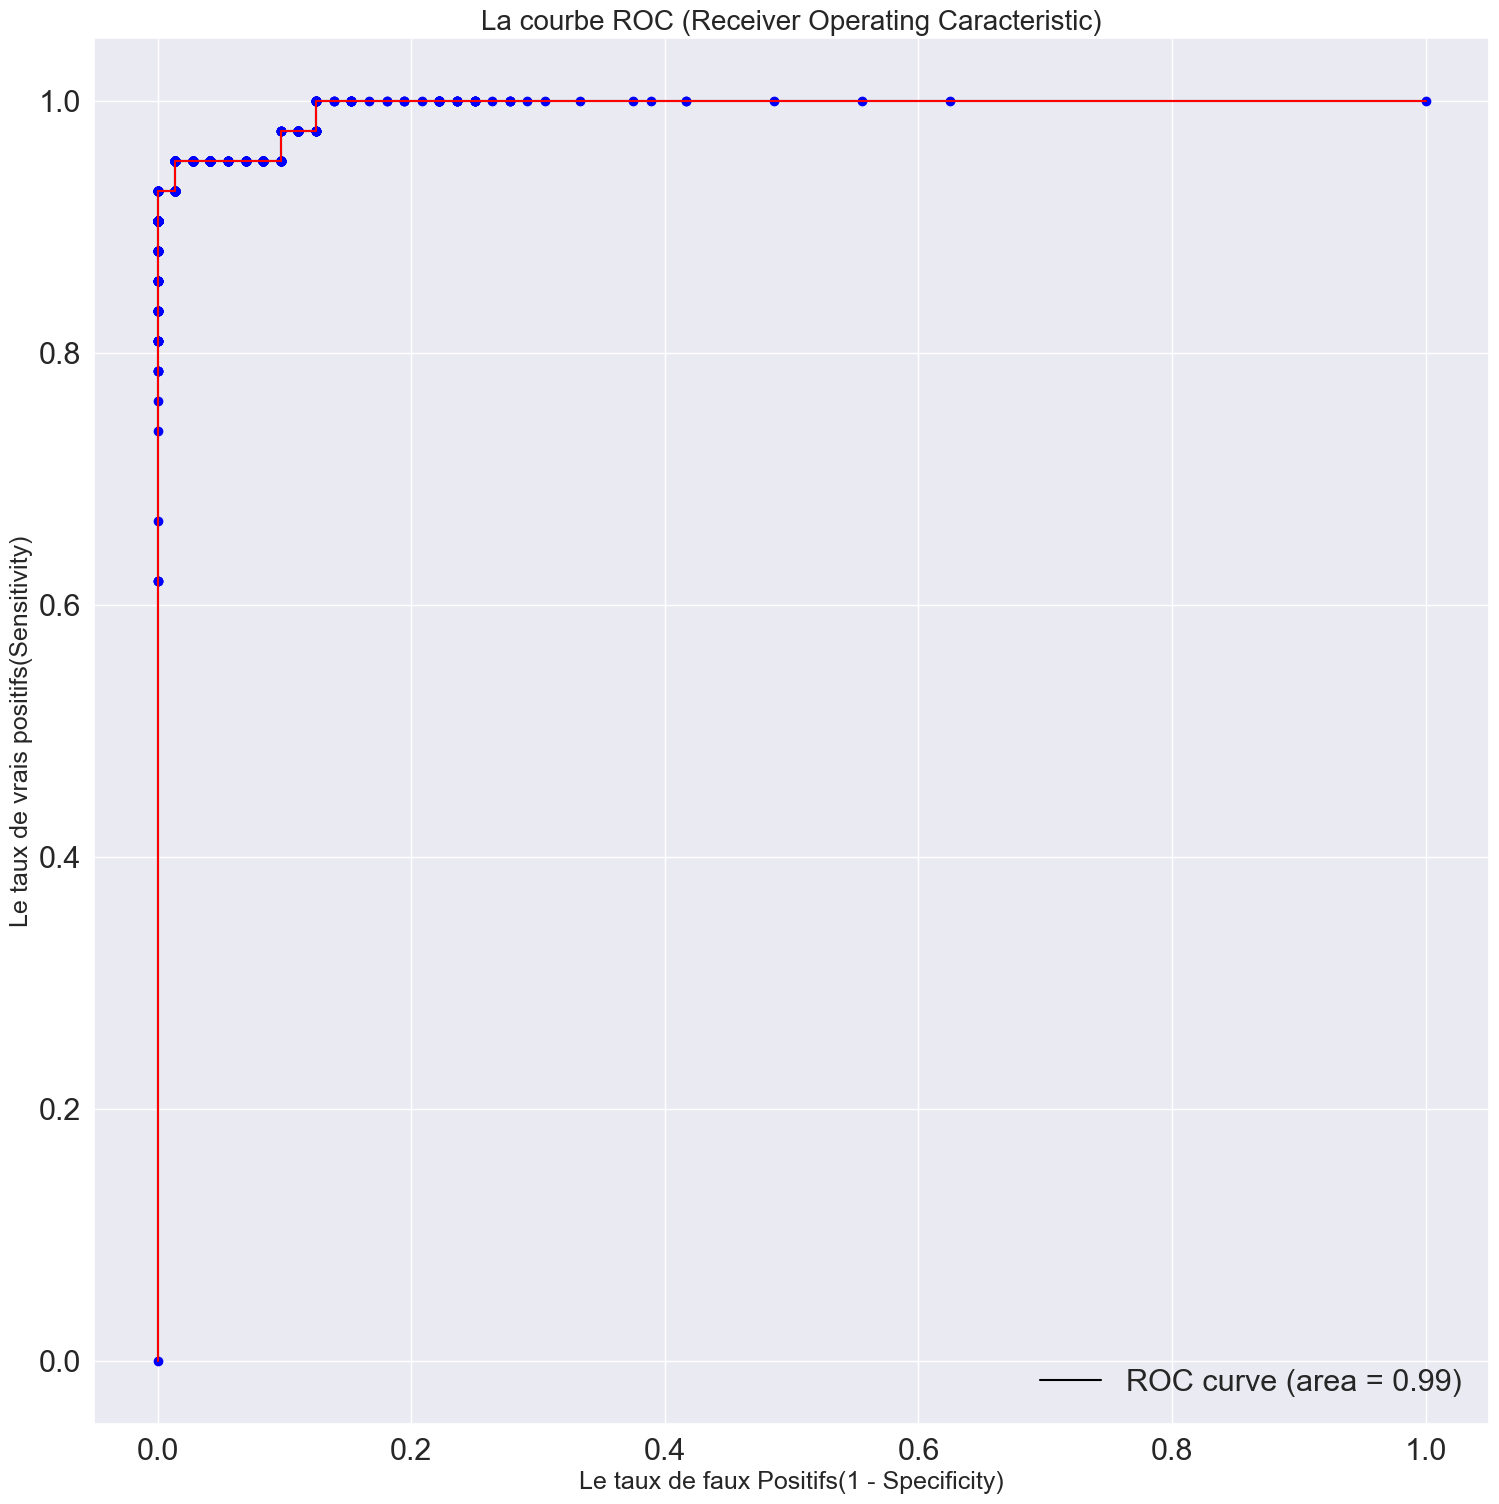

In [28]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
                 roc_auc, color='black')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


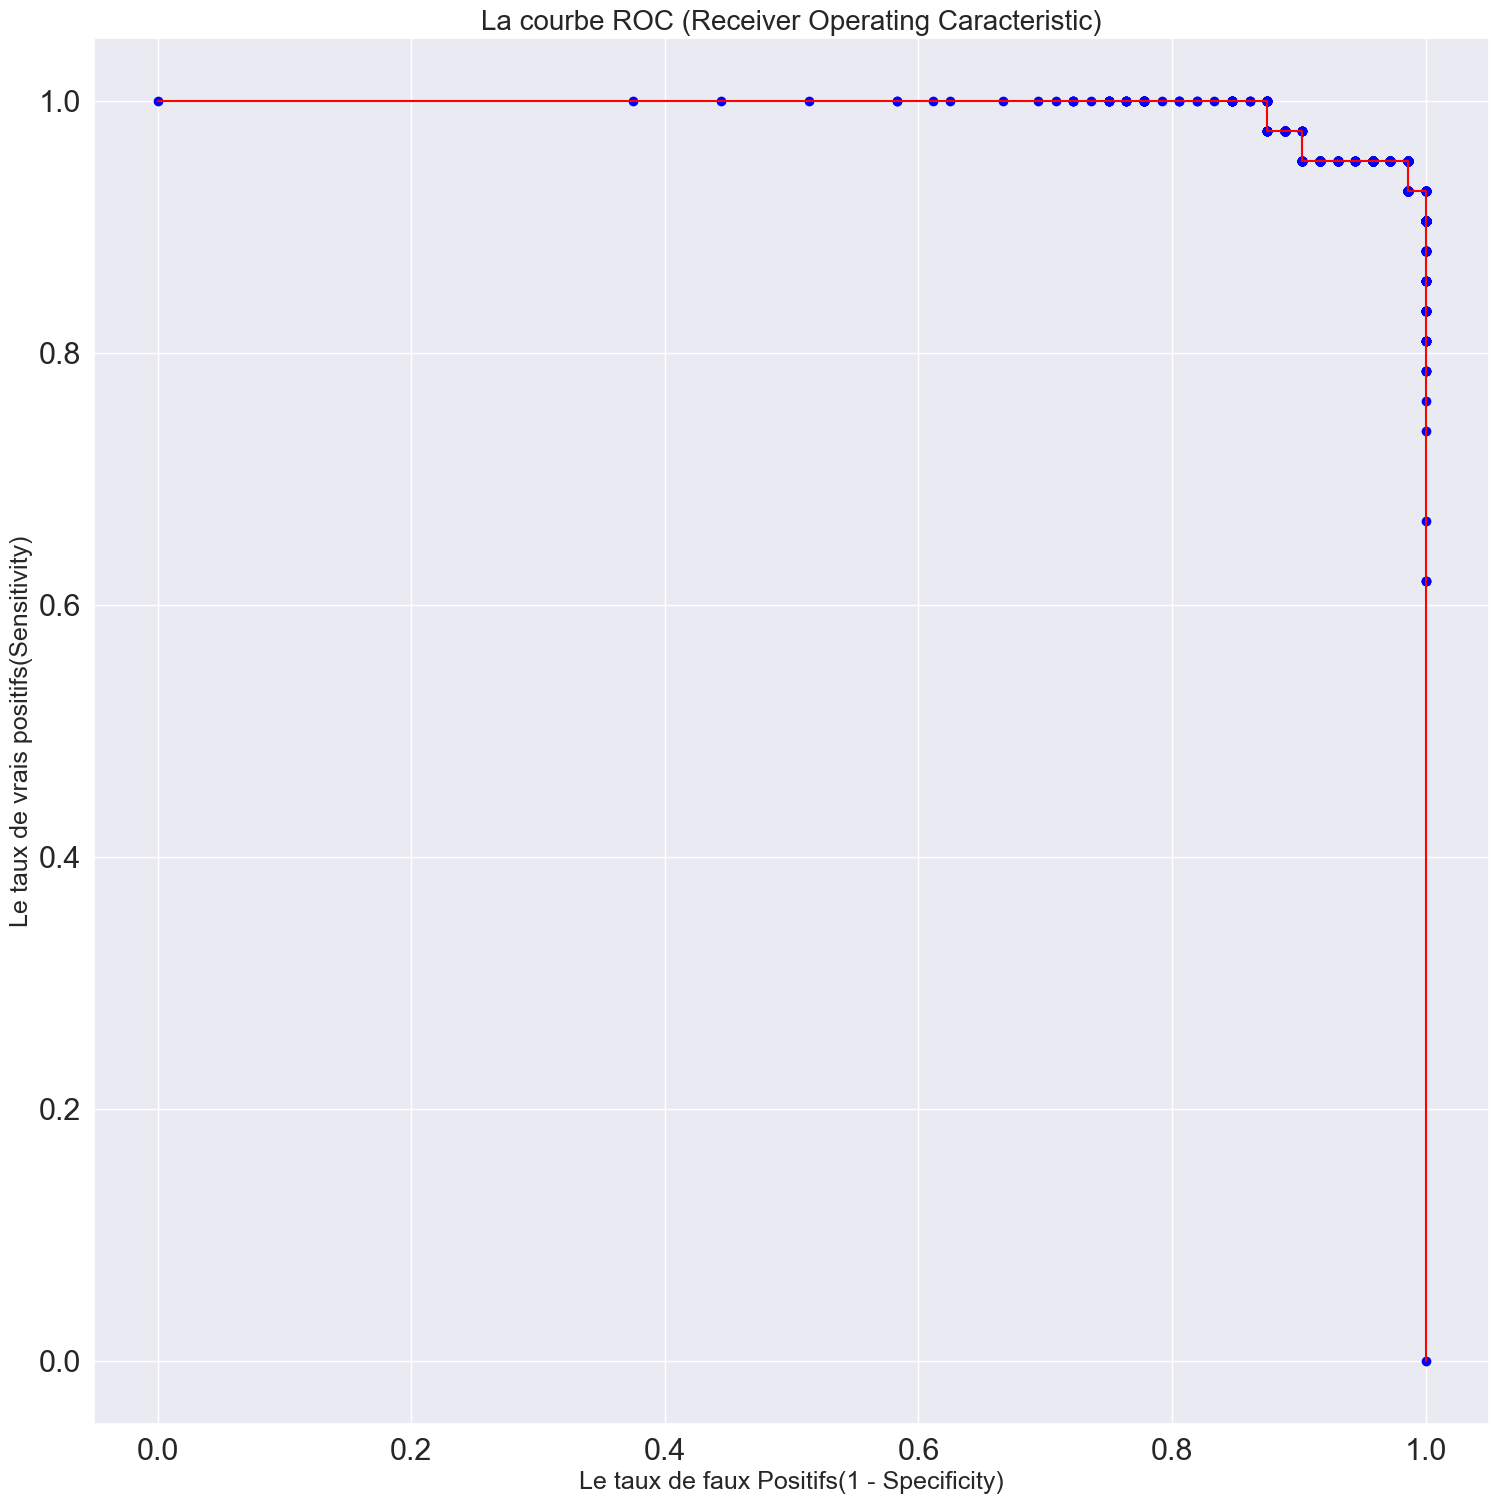

In [27]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
#                  roc_auc, color='black')
plt.scatter( specificite,sensibilite, color='blue')
plt.plot(specificite,sensibilite, 'b', color='red')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

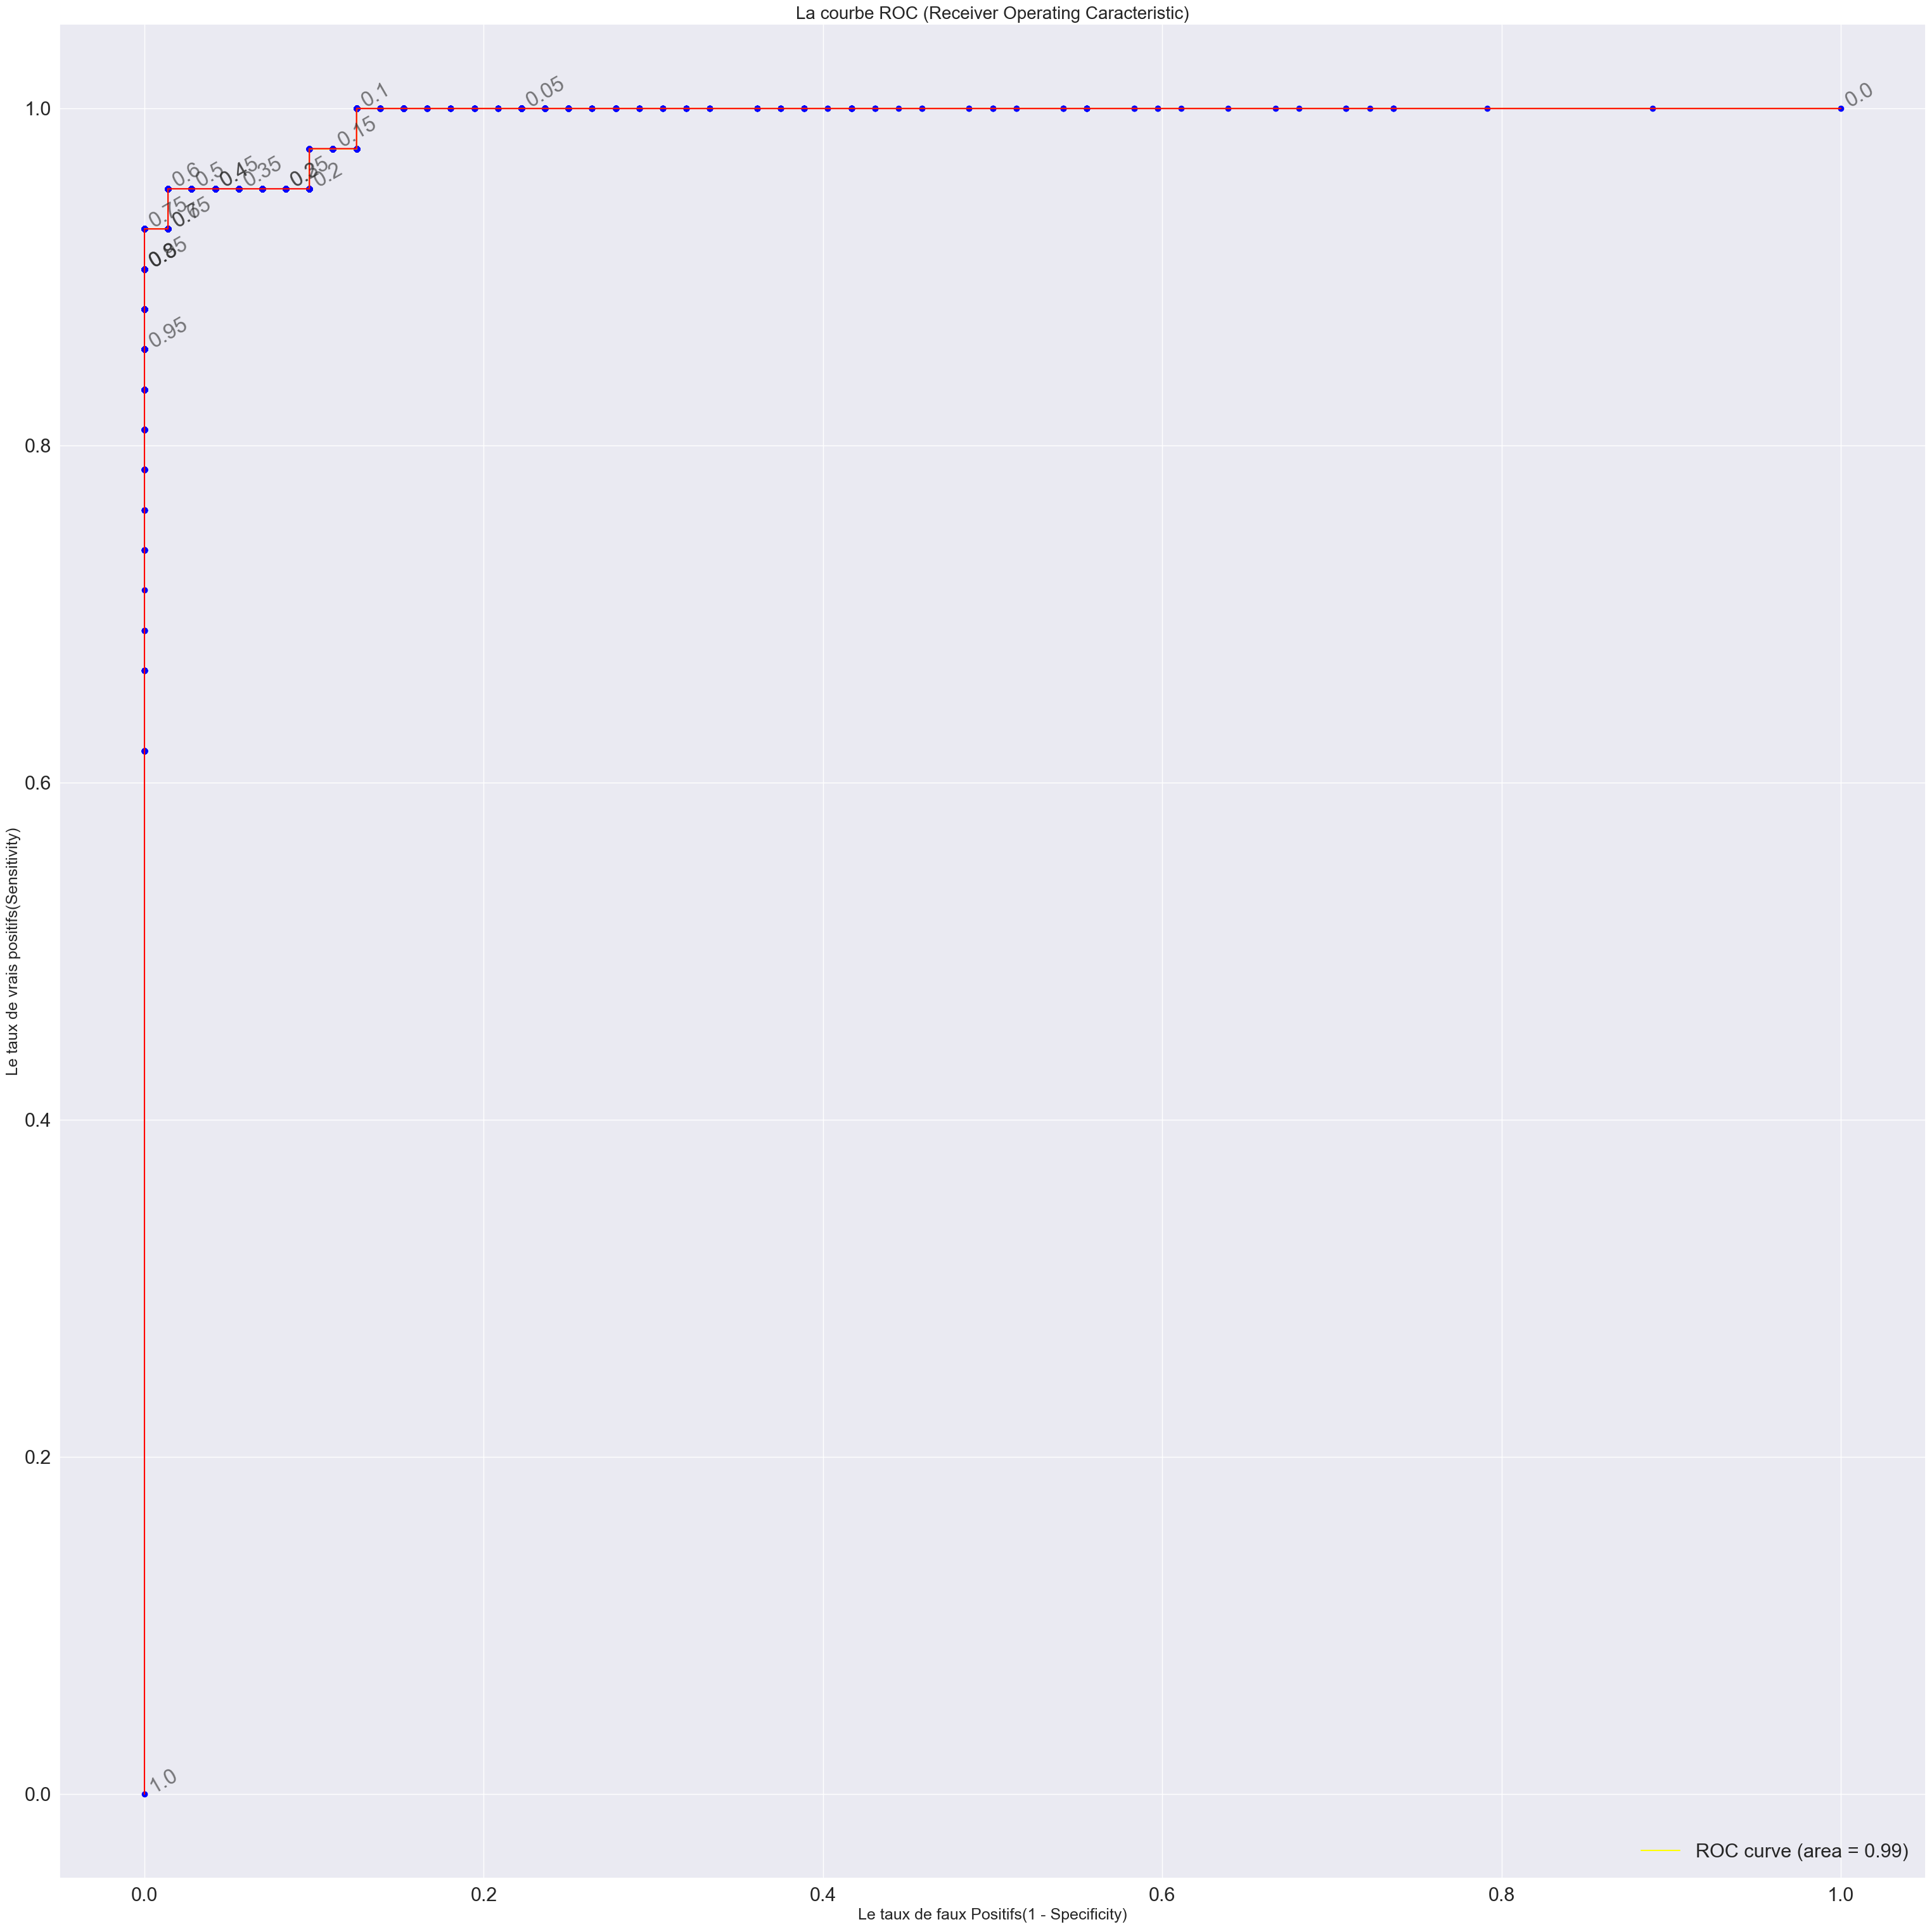

In [22]:
sensibilite = pd.Series(sensibilite)    
specificite = pd.Series(specificite)
plt.figure(figsize=(38, 38))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, 
              color='yellow')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red')

for i in sensibilite.index:
    if i*100 % 5 == 0 :
        plt.text(1 - specificite[i]+0.001,sensibilite[i]+0.001,
                 i, rotation= 30, alpha=0.6)   
    
plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## Le changement du pas de calcul

In [23]:
Sensibilite,Specificite,Precision,F1Score,valeurPreditePositive,valeurPrediteNegative,vraisPositifs,vraisNegatifs,fauxNegatifs,fauxPositifs = \
                        dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict(),dict()

nb = 10
for i in range(nb + 1):
    t = (nb - i) / nb
    Sensibilite[t],Specificite[t],Precision[t],F1Score[t],valeurPreditePositive[t],valeurPrediteNegative[t],vraisPositifs[t],vraisNegatifs[t],fauxNegatifs[t],fauxPositifs[t] = calculMC(dfROC, t)   

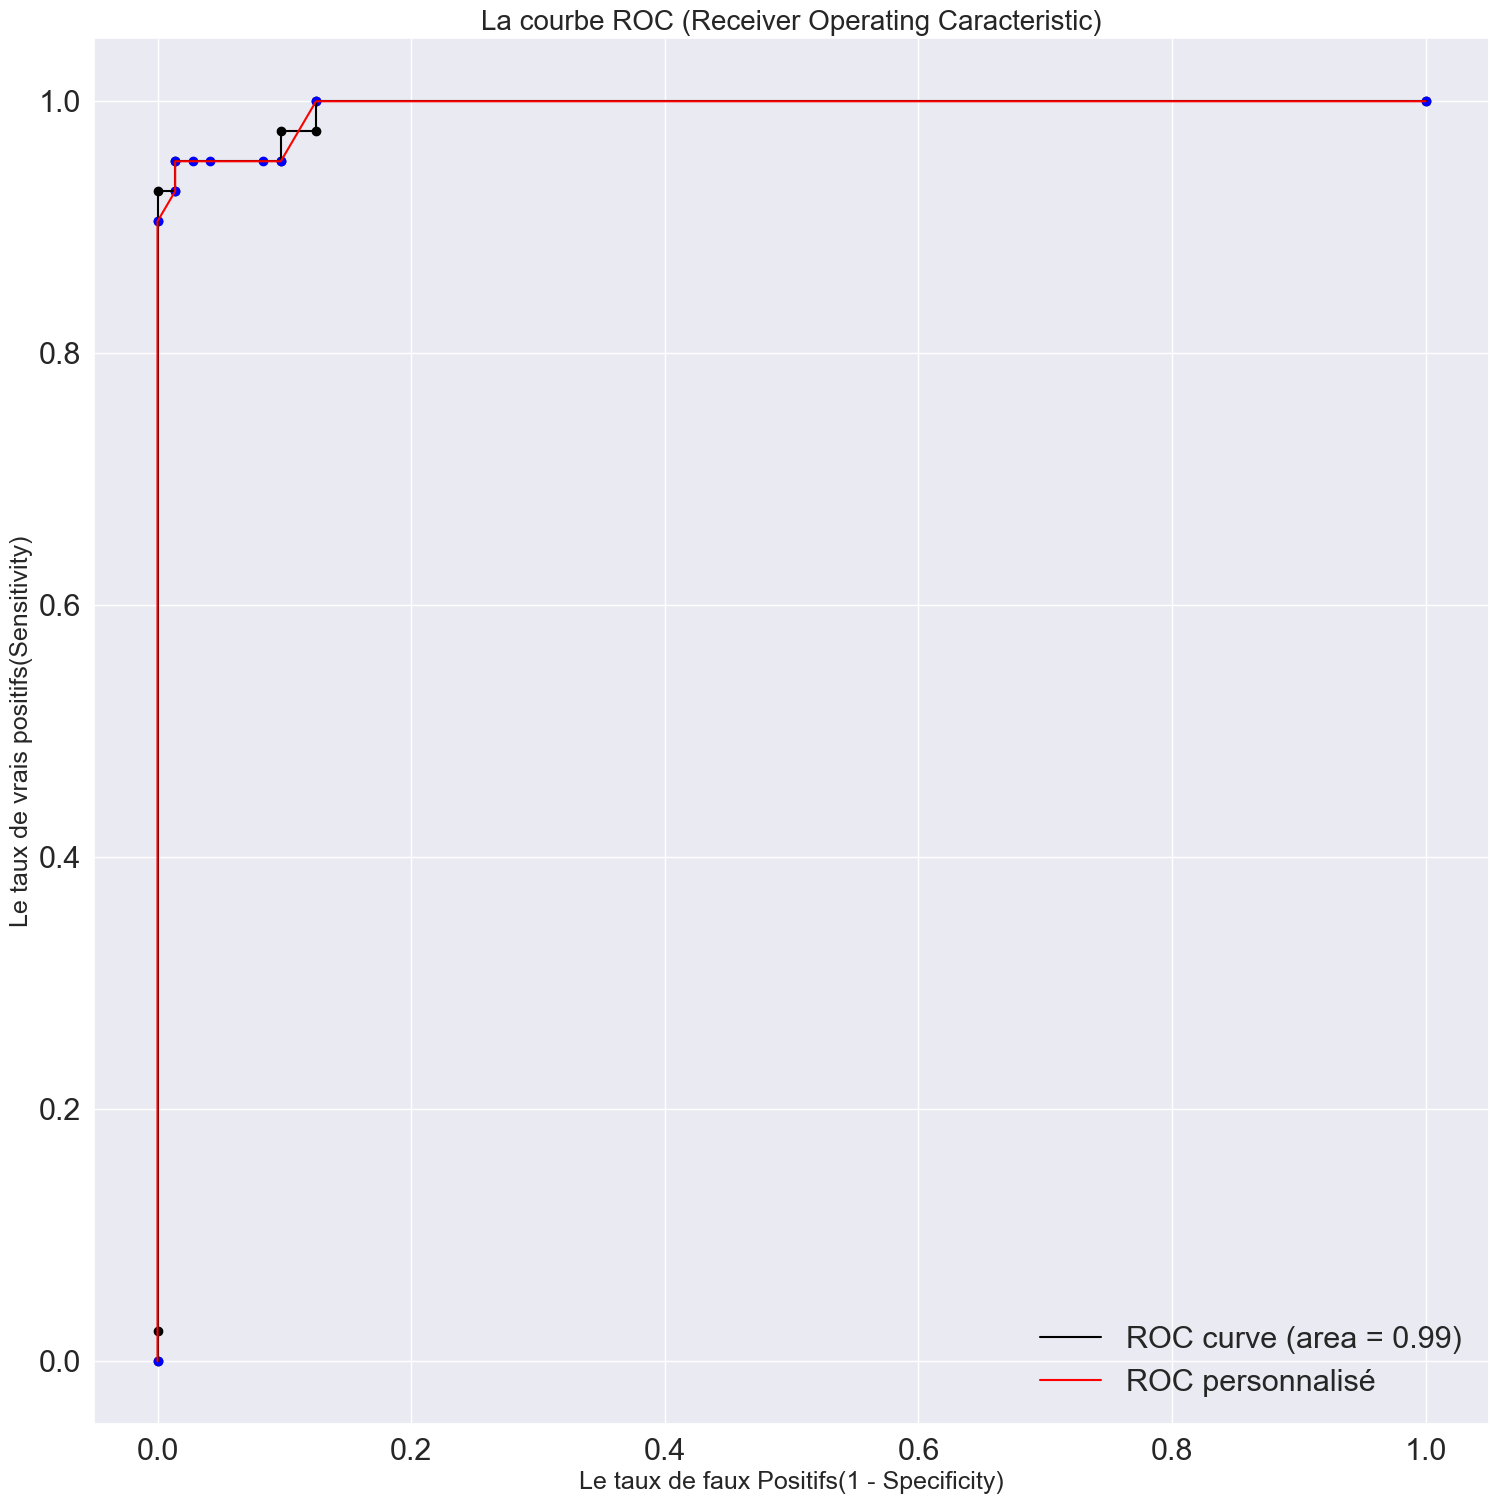

In [24]:
sensibilite = pd.Series(Sensibilite)    
specificite = pd.Series(Specificite)
plt.figure(figsize=(18, 18))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 
                 roc_auc, color='black')
plt.scatter(fpr, tpr, color='black')
plt.scatter(1 - specificite,sensibilite, color='blue')
plt.plot(1-specificite,sensibilite, 'b', color='red', label='ROC personnalisé')

plt.xlabel('Le taux de faux Positifs(1 - Specificity)',size=18)
plt.ylabel('Le taux de vrais positifs(Sensitivity)',size=18)
plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
plt.legend(loc="lower right");

## La courbe précision-rappel

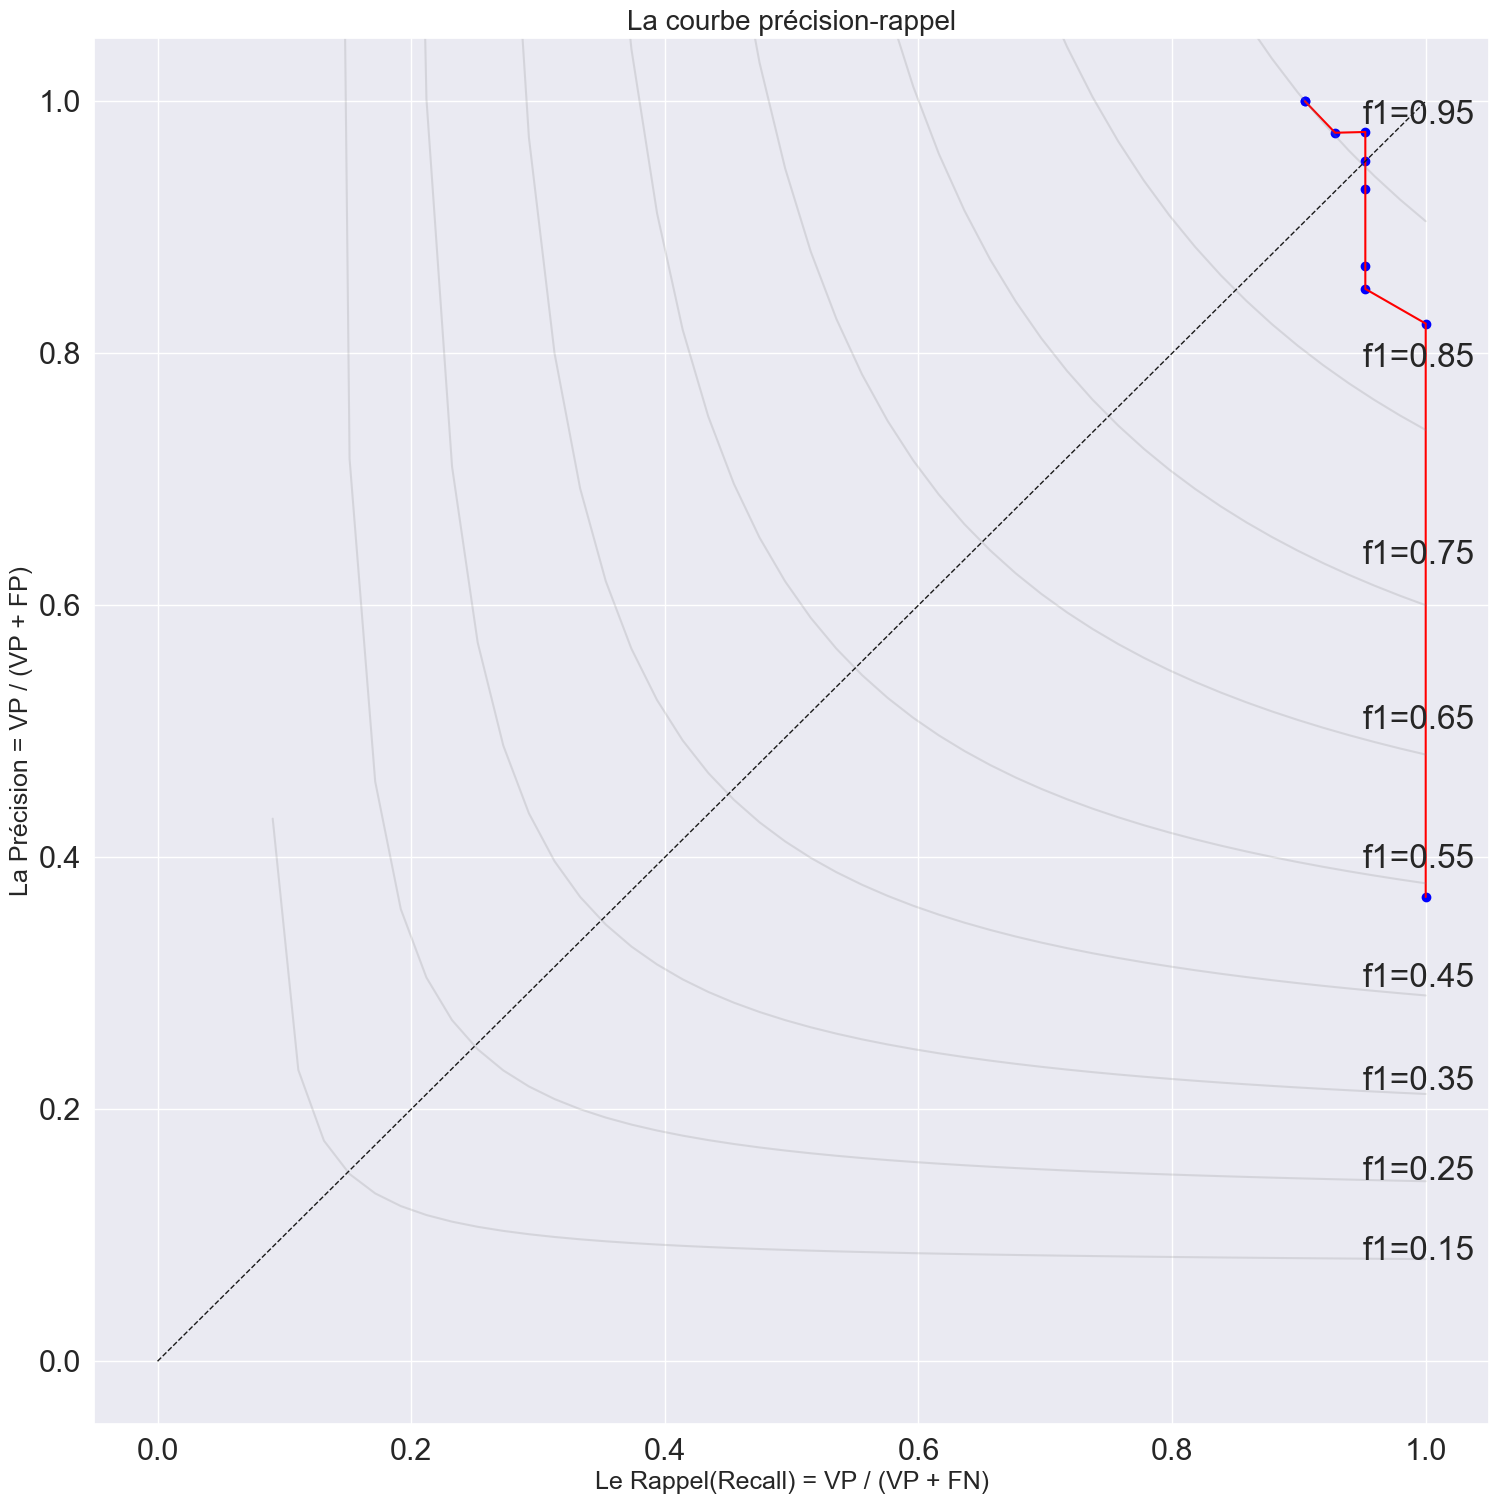

In [25]:
sensibilite = pd.Series(Sensibilite)    
precision = pd.Series(Precision)
plt.figure(figsize=(18, 18))
plt.scatter(sensibilite,precision, color='blue');
plt.plot(sensibilite,precision, 'b', color='red');
f1max = 0.95
f_scores = np.linspace(0.15, f1max, num=9)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.2f}'.format(f_score), xy=(f1max, y[45] - 0.001))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])    
plt.xlabel('Le Rappel(Recall) = VP / (VP + FN)',size=18);
plt.ylabel('La Précision = VP / (VP + FP)',size=18);    
plt.title('La courbe précision-rappel',size=20);